<a href="https://colab.research.google.com/github/MattiaFiore/Source-Coding-Project/blob/main/Huffman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Huffman Coding
In this notebook we will cover how to implement a huffman encoder and a decoder.

## Step 1
Analyzing source statistics is very easy using the Counter object.

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
text = '''Lorem ipsum dolor sit amet. Qui laborum iste eos dolorum optio et odio
 numquam est internos expedita id similique galisum ut quasi laboriosam 33
 dolorem nisi. Qui tempora iusto rem minima iusto aut provident totam At animi
 laudantium et vero vitae ea ratione sunt rem sint eveniet. Et dicta dolores
 sed nemo enim est rerum voluptatum qui placeat dolore est voluptatem molestiae
 aut iure corrupti.'''
count = Counter(text)

<BarContainer object of 27 artists>

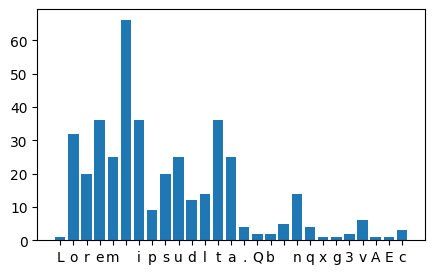

In [ ]:
plt.rcParams['figure.figsize'] = (5, 3)
plt.bar(count.keys(), count.values())

In [ ]:
# This dictionary the chars as keys and their probability
# as values
dictionary = {j : k /count.total() for j,k in count.items()}


#To see the dictionary you can uncomment the for loop
#with the print.

#for j,k in dictionary.items():
#  print(f'Symbol: {j}\nProbability: {k}')

## Step 2
We need a function that will be able to group symbols and get all the possible combination.


```python
def create_groups(symbols, length):
```

That with:
```python
create_groups([A,B], 2)
```
Returns output:
```python
['AA', 'AB', 'BA', 'BB']
```
Luckily this is exactly what the product function of the itertools library do:

In [ ]:
from itertools import product

In [ ]:
def create_blocks(symbols, length):
  return list(product(symbols, repeat = length))

In [ ]:
create_blocks(['A', 'B'], 2)

[('A', 'A'), ('A', 'B'), ('B', 'A'), ('B', 'B')]

## Step 3
We want to computer probability of the group. For example if we have ['AA', 'AB', 'BA', 'AA'] and p(A) = 0.9 while p(B) = 0.1 we should get:

P(AA) = 0.81 P(AB) = 0.09 p(BA) = 0.09 P(BB) = 0.01

In [ ]:
import math

In [ ]:
def gen_dict(groups, probability):
  return { j:math.prod([probability[i] for i in j]) for j in groups}

In [ ]:
dictionary = gen_dict([('A', 'A'), ('A', 'B'), ('B', 'A'), ('B', 'B')], {'A':0.9, 'B': 0.1})

for j,k in dictionary.items():
  print(f'key: {j} - value: {k}')

key: ('A', 'A') - value: 0.81
key: ('A', 'B') - value: 0.09000000000000001
key: ('B', 'A') - value: 0.09000000000000001
key: ('B', 'B') - value: 0.010000000000000002


# Step 1-2-3 Combined

We can put togheter all steps to create the starting point for a huffman encoder scheme. We'll do this on a DNA sequence: https://www.biointeractive.org/sites/default/files/Anolis-DNA-sequences.txt

The len of the text is 1173, since it is divisible by trhee we'll use groups of 3.

In [ ]:
from collections import Counter
from itertools import product
import math
import matplotlib.pyplot as plt


def create_blocks(symbols, length):
  return list(product(symbols, repeat = length))

def gen_dict(groups, probability):
  return { j:math.prod([probability[i] for i in j]) for j in groups}

DNA_sequence = """ATGAGCCCCCTTACAACAACAATTCTACTATCAAGCTTAGCAACCGGCACCATCATTACAGCCACAAGCTATCACTGACTATTAGCTTGAATTGGCCTTGAACTAAACACATTAGCTATCATTCCAATTATCTCAAAACAACATCACCCCCGAGCGACAGAGGCCGCCACCAAGTACTTCTTAACTCAAGCAGCTGCTTCAGCACTAATCCTATTCTCAAGTACAATCAACGCTTGACACTCAGGAACTTGGGACATTACACAAATAACAAACAATACATCAAACATCTTACTAACAATGGCACTAGCCATAAAATTAGGCCTTGCACCAACACACTACTGACTCCCAGAGGTTATTCAAGGAACATCAATAACAACAGCCCTAATTATTACTACGTGACAAAAACTAGCCCCTATAGCACTCATTATTATTACAAGCAACAACTTATCCTATATAGTCTTAATAACAATGGGGGTATTATCTACCATCGTAGGAGGATGGGGCGGCCTAAACCAAACCCAAACCCGAAAAATCATAGCGTACTCCTCAATCGCACACCTTGGCTGAATATCAATGGTTACCCCACTAATAACAAAACTACTCATTTTAAACCTTGGCATTTACATCCTAATAACAACAGCTATATTCCTCTCACTAATTTTATCAAAATCAAAAACCTTACAAGATACATCCACACTATGGGCACTATCCCCAACACTTATAATTTTAACAATACTAACACTATTATCCCTAGGAGGACTGCCCCCACTAACAGGATTCATACCCAAGTGACTTATTCTACAAGAATTAACAGCACAAAACCTACTAATAGTAGCCACACTTCTAGCCCTATCAGCACTCTTAAGCCTCTTCTTTTACCTCCGACTAACATACACAATGACCCTTACCACACCCCCCAACACCACTATATTCAAACACAAATGACGGTTTAACTATTTAAATAATACAACTCCCCTATCCATCTCCATAGCCCTCTCAACCCTATTATTACCAATTACACCCCTCATCATAATATAGAAACTTAGGATAACATTAAACCAAGGGCCTTCAAAGCCCAAAATAGGAGTGAAAATCCCCTAGTCTCTGATAAGACCTGTGATATTCTAAAACACATCTTCTGAATGCAACCCAGACAC"""

count = Counter(DNA_sequence)
probabilities = {j : k /count.total() for j,k in count.items()}
N = 1
groups = create_blocks(probabilities.keys(), N)
dictionary = gen_dict(groups, probabilities)


# We clean the dictionary
dictionary = {j[0]: k for j,k in dictionary.items()}
for j,k in dictionary.items():
  print(f'key: {j} - value: {k}')



key: A - value: 0.35868625756266204
key: T - value: 0.24546240276577355
key: G - value: 0.1097666378565255
key: C - value: 0.28608470181503887


# Step 4

Now we need to have a function that given the dictionary is able to generate and encoding dictionary.


```
{'AAA': '001011',
 'AAB': '0001',
 ...}
```
That will make the encoding procedure very easy. Once the dictionary is complete you just have to read group one group at the time and convert it through the dictionary.

The decoding procedure is a little bit different since at the output of the encoding procedure the output will be with variable length. For this reaason we will need a tree data structure, that we will traverse on every bit.


In [ ]:
class Group():

  def __init__(self, group, probability, code = "", more = []):

    self.group = group
    self.probability = probability
    self.code = code
    self.more = more

  def add_bit(self, bit):
    self.code = bit + self.code

  def __add__(self, element):

    # Probability sum of elements
    probability = self.get_probability() + element.get_probability()

    # list of elements
    more = []
    if self.get_group() == 'MORE':
      more += self.get_more()
    else:
      more.append(self)

    if element.get_group() == 'MORE':
      more += element.get_more()
    else:
      more.append(element)

    return Group(group = 'MORE', probability = probability, code = 'MORE', more = more)


  def get_probability(self):
    return self.probability

  def get_group(self):
    return self.group

  def get_code(self):
    return self.code

  def get_more(self):
    return self.more

  def __str__(self):
    return f'Group: {self.get_group()}\nProbability: {self.get_probability()}\nCode: {self.get_code()}\nMore: {self.get_more()}'


In [ ]:
groups = [Group(j,k) for j,k in dictionary.items()]
for i in groups:
  print(str(i))

Group: A
Probability: 0.35868625756266204
Code: 
More: []
Group: T
Probability: 0.24546240276577355
Code: 
More: []
Group: G
Probability: 0.1097666378565255
Code: 
More: []
Group: C
Probability: 0.28608470181503887
Code: 
More: []


In [ ]:
elem = groups[0] + groups[1]
for i in elem.get_more():
  print(i)

Group: A
Probability: 0.35868625756266204
Code: 
More: []
Group: T
Probability: 0.24546240276577355
Code: 
More: []


In [ ]:
 def huffman(dictionary):
  groups = [Group(j,k) for j,k in dictionary.items()]

  while len(groups) > 1:

    # sort

    groups.sort(key = lambda x: x.get_probability(), reverse = True)

    # take last two elements

    elem1 = groups.pop(-1)
    elem2 = groups.pop(-1)

    # Add bits

    if elem1.get_group() != 'MORE':
        elem1.add_bit("1")
    else:
        for i in elem1.get_more():
          i.add_bit("1")


    if elem2.get_group() != 'MORE':
        elem2.add_bit("0")
    else:
        for i in elem2.get_more():
            i.add_bit("0")

    # Combine elements and add new elements

    combined = elem1 + elem2
    groups.append(combined)

  # After the while loop we have just one element inside
  # the group list and this element will have all all the
  # groups inside the attribute more:

  dictionary = {i.get_group(): i.get_code() for i in groups[0].get_more()}
  return dictionary



In [ ]:
val = huffman(dictionary)
val

{'A': '1', 'C': '01', 'G': '001', 'T': '000'}

Now we can construct the tree form the dictionary. We will use the code for the tree used in the previous Jupyter Notebook.

# Code from previous notebook

In [ ]:
class Node():

  def __init__(self, string = '', parent = None, data = None):

    self.string = string
    self.data = data
    self.parent = parent
    self.left = None
    self.right = None

  def get_string(self):
    return self.string

  def get_left(self):
    return self.left

  def get_right(self):
    return self.right

  def get_data(self):
    return self.data

  def set_string(self, new_string):
    self.string = new_string

  def set_left(self, new_left):
    self.left = new_left

  def set_right(self, new_right):
    self.right = new_right

  def set_data(self, data):
    self.data = data

  def __str__(self):
    return self.get_string()

In [ ]:
class Tree():

  def __init__(self):
    # Root is a node with no parent
    # no left no right child at the moment
    # No string attached

    self.root = Node('Root')
    self.node_names = [self.root.get_string()]
    self.edges = []

  def search(self, father):

    # father is a string
    node = self.get_root()

    if father == 'Root':
      return self.get_root()

    for i in father:
      if i == '0':
        node = node.get_left()
        pass
      else:
        node = node.get_right()

    return node

  def add_child(self, father, child, data=None):

    """
    Father: is the data string
    Child: is the data string

    Our logic will be 0 on the left and 1 on the right

                      Root
                   /        \
                  0          1
                /   \      /   \
               00   01    10    11


    """
    # We first search for the father
    father_node = self.search(father)

    if child[-1] == '0':
      father_node.set_left(Node(string = child, parent = father_node, data = data))

    else:
      father_node.set_right(Node(string = child, parent = father_node, data = data))

    self.node_names.append(child)
    self.edges.append((child, father))

  def is_node_present(self, node):
    return node in self.get_node_names()

  def get_node_names(self):
    return self.node_names

  def get_edges(self):
    return self.edges

  def get_root(self):
    return self.root

# Converting dictionary into tree

In [ ]:
tree = Tree()

for j,k in val.items():

  path = ['Root'] + [k[:i+1] for i in range(len(k))]

  for i in range(len(k)):
    if tree.is_node_present(path[i+1]):
      # If node present don't add node
      pass

    else:
      if i == len(k)-1:
        tree.add_child(father = path[i], child = path[i+1], data = j)

      else:
        tree.add_child(father = path[i], child = path[i+1])

In [ ]:
def x_pos(elem, length):
  x_pos = 0
  for i in range(len(elem)):
    if elem[i] == '0':
      x_pos -= (2**(-i))
    else:
      x_pos += (2**(-i))
  return x_pos

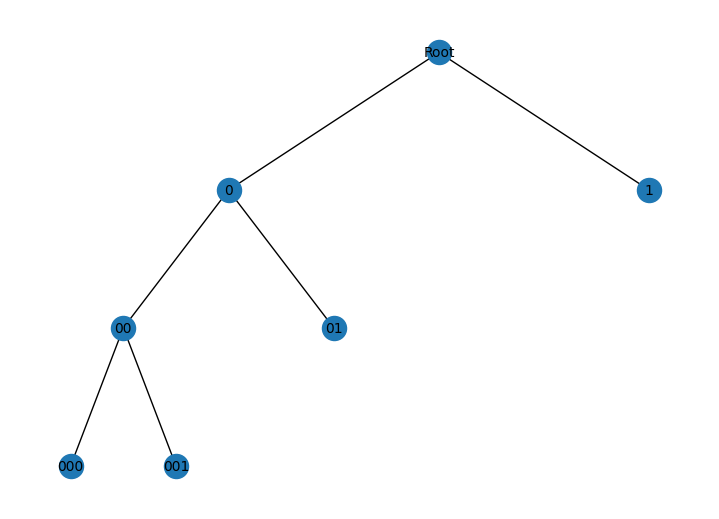

In [ ]:
import networkx as nx

G = nx.Graph()

G.add_nodes_from(tree.get_node_names())
G.add_edges_from(tree.get_edges())


pos = {i:(x_pos(i, len(i)),-len(i)) for i in tree.get_node_names()}
pos['Root'] = (0,0)
plt.rcParams['figure.figsize'] = (7, 5)
nx.draw(G,pos = pos, with_labels = True, font_size=10)

In [ ]:
print(tree.search('1').get_data())
print(tree.search('01').get_data())
print(tree.search('001').get_data())
print(tree.search('000').get_data())

A
C
G
T


# Huffman encoding
Once we found the dictionary for the conversion the conversion is actually pretty easy.

In [ ]:
DNA_sequence = "ATGAGCCCCCTTACAACAACAATTCTACTATCAAGCTTAGCAACCGGCACCATCATTACAGCCACAAGCTATCACTGACTATTAGCTTGAATTGGCCTTGAACTAAACACATTAGCTATCATTCCAATTATCTCAAAACAACATCACCCCCGAGCGACAGAGGCCGCCACCAAGTACTTCTTAACTCAAGCAGCTGCTTCAGCACTAATCCTATTCTCAAGTACAATCAACGCTTGACACTCAGGAACTTGGGACATTACACAAATAACAAACAATACATCAAACATCTTACTAACAATGGCACTAGCCATAAAATTAGGCCTTGCACCAACACACTACTGACTCCCAGAGGTTATTCAAGGAACATCAATAACAACAGCCCTAATTATTACTACGTGACAAAAACTAGCCCCTATAGCACTCATTATTATTACAAGCAACAACTTATCCTATATAGTCTTAATAACAATGGGGGTATTATCTACCATCGTAGGAGGATGGGGCGGCCTAAACCAAACCCAAACCCGAAAAATCATAGCGTACTCCTCAATCGCACACCTTGGCTGAATATCAATGGTTACCCCACTAATAACAAAACTACTCATTTTAAACCTTGGCATTTACATCCTAATAACAACAGCTATATTCCTCTCACTAATTTTATCAAAATCAAAAACCTTACAAGATACATCCACACTATGGGCACTATCCCCAACACTTATAATTTTAACAATACTAACACTATTATCCCTAGGAGGACTGCCCCCACTAACAGGATTCATACCCAAGTGACTTATTCTACAAGAATTAACAGCACAAAACCTACTAATAGTAGCCACACTTCTAGCCCTATCAGCACTCTTAAGCCTCTTCTTTTACCTCCGACTAACATACACAATGACCCTTACCACACCCCCCAACACCACTATATTCAAACACAAATGACGGTTTAACTATTTAAATAATACAACTCCCCTATCCATCTCCATAGCCCTCTCAACCCTATTATTACCAATTACACCCCTCATCATAATATAGAAACTTAGGATAACATTAAACCAAGGGCCTTCAAAGCCCAAAATAGGAGTGAAAATCCCCTAGTCTCTGATAAGACCTGTGATATTCTAAAACACATCTTCTGAATGCAACCCAGACAC"
dictionary = {'A': '1', 'C':'01', 'G':'001', 'T':'000'}

encoded_seq = ""

for i in DNA_sequence:
  encoded_seq += dictionary[i]

encoded_seq

'100000110010101010101000000101110111011100000001000101000100001110010100000010010111010100100101101011000011000000101100101011011100101000100001101000001101000100000010010100000000111000000001001010100000000111010001110110110000001001010001000011000000010111000000100001000011111011101100001101010101010011001010011011001100100101010010101101011100100010100000001000000110100001110010110010100000101000000011001011010001100001010001000000010000111001000101110000111010010100000000110110100001100100111010000000010010011011000000101101111000110111101110001011000011110110000100000010100011011100000100101101000100101011000111100000010010010101000000001011010111011011010001010000011010000101011001100100100000010000000111001001110110000111000110111011001010101000110000001000000101000101001000001101111110100010010101010100010001001011010000110000001000000100000010111001011101110100000010000101000100010001001000010000001100011011100000100100100100100010000001000010001010110000100100010010011001001

# Huffman decoding animation
For the decoding we need to use the tree since deconding is not easy as deconding. We can visualize the decoding process.




In [66]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc


G = nx.Graph()
node_names = tree.get_node_names()
print(node_names)
G.add_nodes_from(node_names)
G.add_edges_from(tree.get_edges())

node_to_color = {i:'lightblue' for i in node_names}
node_to_color['Root'] = 'orange'
nc = node_to_color.values()

visiting_node = tree.get_root()
encoded_seq_ = encoded_seq[:30]
print(encoded_seq_)
#node_to_color[visiting_node.get_string()] = 'orange'

['Root', '1', '0', '01', '00', '001', '000']
100000110010101010101000000101


In [78]:
# create the frame
import matplotlib
def update(i, encoded_seq_, node_to_color, nodes):

  global visiting_node
  #print(visiting_node.get_string())

  if visiting_node.get_left() == None and visiting_node.get_right() == None:
    node_to_color[visiting_node.get_string()] = 'lightblue'
    visiting_node = tree.get_root()
    node_to_color[visiting_node.get_string()] = 'orange'

  if encoded_seq[i] == '0':
    node_to_color[visiting_node.get_string()] = 'lightblue'
    visiting_node = visiting_node.get_left()
    node_to_color[visiting_node.get_string()] = 'orange'


  else:
    node_to_color[visiting_node.get_string()] = 'lightblue'
    visiting_node = visiting_node.get_right()
    node_to_color[visiting_node.get_string()] = 'orange'

  node_to_color['Root'] = 'orange'


  nodes.set_color(list(node_to_color.values()))
  return nodes,


# set up the image
fig = plt.figure()
nodes = nx.draw_networkx_nodes(G,pos,node_color=nc,node_size=400)
edges = nx.draw_networkx_edges(G,pos)

labels = {}
for i in node_names:
  labels[i] = r"$"+i+"$"

nx.draw_networkx_labels(G, pos, labels, font_size=12)

# create animation
anim = animation.FuncAnimation(fig, update, fargs = (encoded_seq_, node_to_color, nodes), frames=40, interval=1000, blit = True)
plt.close()


matplotlib.rcParams['animation.embed_limit'] = 2**128
rc('animation', html='jshtml')
anim.save('huffman.mp4', writer="ffmpeg", dpi=300)
anim

In [64]:
encoded_seq_

'100000110010101010101000000101'

# Huffman decoding

In [ ]:
visiting_node = tree.get_root()
decoded_seq = ""

for i in encoded_seq:
  if i == '0':
    visiting_node = visiting_node.get_left()
  else:
    visiting_node = visiting_node.get_right()

  if visiting_node.get_left() == None and visiting_node.get_right() == None:
    decoded_seq += visiting_node.get_data()
    visiting_node = tree.get_root()

decoded_seq


'ATGAGCCCCCTTACAACAACAATTCTACTATCAAGCTTAGCAACCGGCACCATCATTACAGCCACAAGCTATCACTGACTATTAGCTTGAATTGGCCTTGAACTAAACACATTAGCTATCATTCCAATTATCTCAAAACAACATCACCCCCGAGCGACAGAGGCCGCCACCAAGTACTTCTTAACTCAAGCAGCTGCTTCAGCACTAATCCTATTCTCAAGTACAATCAACGCTTGACACTCAGGAACTTGGGACATTACACAAATAACAAACAATACATCAAACATCTTACTAACAATGGCACTAGCCATAAAATTAGGCCTTGCACCAACACACTACTGACTCCCAGAGGTTATTCAAGGAACATCAATAACAACAGCCCTAATTATTACTACGTGACAAAAACTAGCCCCTATAGCACTCATTATTATTACAAGCAACAACTTATCCTATATAGTCTTAATAACAATGGGGGTATTATCTACCATCGTAGGAGGATGGGGCGGCCTAAACCAAACCCAAACCCGAAAAATCATAGCGTACTCCTCAATCGCACACCTTGGCTGAATATCAATGGTTACCCCACTAATAACAAAACTACTCATTTTAAACCTTGGCATTTACATCCTAATAACAACAGCTATATTCCTCTCACTAATTTTATCAAAATCAAAAACCTTACAAGATACATCCACACTATGGGCACTATCCCCAACACTTATAATTTTAACAATACTAACACTATTATCCCTAGGAGGACTGCCCCCACTAACAGGATTCATACCCAAGTGACTTATTCTACAAGAATTAACAGCACAAAACCTACTAATAGTAGCCACACTTCTAGCCCTATCAGCACTCTTAAGCCTCTTCTTTTACCTCCGACTAACATACACAATGACCCTTACCACACCCCCCAACACCACTATATTCAAACACAAATGACGGTTTAACTATTTAAATAATACAACTCCCCTATCCATCTCCATAGCCCTCTCA

In [ ]:
decoded_seq == DNA_sequence

True